In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [524]:
df=pd.read_csv("C:/Users/essam/OneDrive/Desktop/models/london_houses.csv")
df.head(

<bound method NDFrame.head of                    Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
0         78 Regent Street  Notting Hill         2          3            179   
1        198 Oxford Street   Westminster         2          1            123   
2         18 Regent Street          Soho         5          3            168   
3     39 Piccadilly Circus     Islington         5          1            237   
4         116 Fleet Street    Marylebone         4          1            127   
..                     ...           ...       ...        ...            ...   
995  44 Camden High Street   Westminster         1          3             81   
996          165 Park Lane        Camden         1          1             65   
997  99 Camden High Street        Camden         4          1            191   
998          155 Park Lane        Camden         5          2            131   
999       145 Baker Street    Kensington         4          2            185   

     Buil

Exploring the data

I will try explore each feature of the data to infer the correlations between them and with the house price data.

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

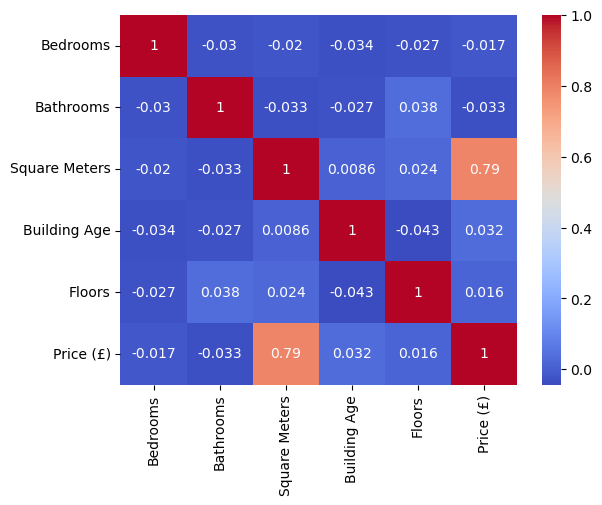

In [427]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap=("coolwarm"))
plt.show()

In [428]:
# First replace the address with the street name only
df['Address'] = df['Address'].str.replace(r'^\d+\s', '', regex=True)
df['Address']

0           Regent Street
1           Oxford Street
2           Regent Street
3       Piccadilly Circus
4            Fleet Street
              ...        
995    Camden High Street
996             Park Lane
997    Camden High Street
998             Park Lane
999          Baker Street
Name: Address, Length: 1000, dtype: object

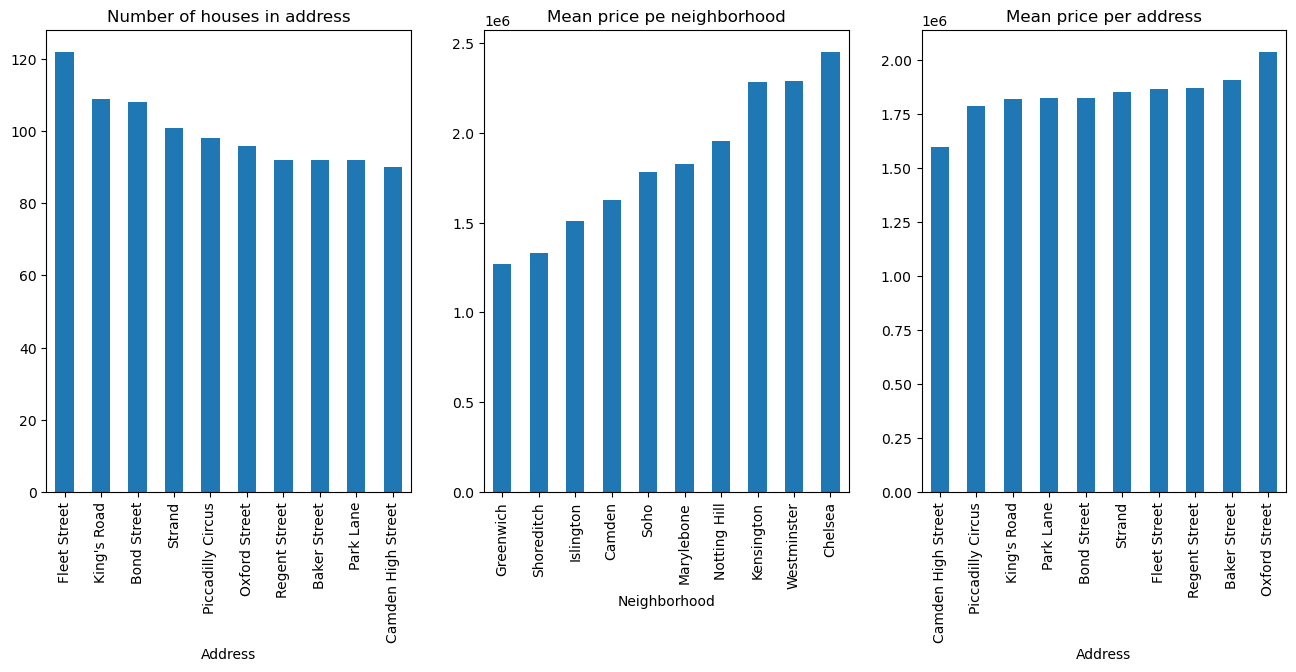

In [430]:
# Now we can see that the address is more readable and has less features
# I want to see the distribution of the houses, the area and price per address

# Plotting the distribution of the houses, the area and price per address
fig, ax=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

df['Address'].value_counts().plot(kind='bar', ax = ax[0]) 

df["Price (£)"].groupby(df["Neighborhood"]).mean().sort_values().plot(kind="bar",ax=ax[1])

df["Price (£)"].groupby(df[("Address")]).mean().sort_values().plot(kind="bar",ax=ax[2])

ax[0].set_title("Number of houses in address")
ax[1].set_title("Mean price pe neighborhood")
ax[2].set_title("Mean price per address")

plt.show();


The mean price for address is quiet equal .But the mean price for neighborhoods are different 

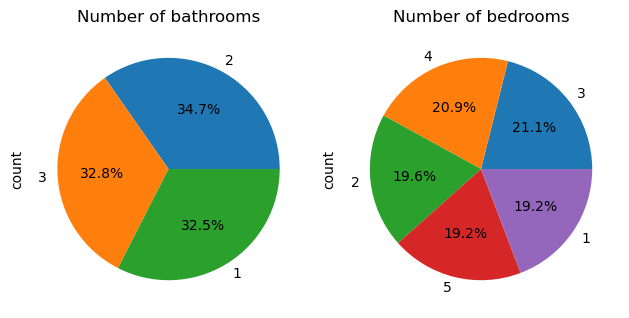

In [432]:

fig ,ax=plt.subplots(nrows=1,ncols=2)

df["Bathrooms"].value_counts().plot(kind="pie", autopct="%1.1f%%",ax=ax[0])
df["Bedrooms"].value_counts().plot(kind="pie", autopct="%1.1f%%",ax=ax[1])

ax[0].set_title("Number of bathrooms")
ax[1].set_title("Number of bedrooms")

plt.tight_layout()
plt.show()

In [433]:
Bedroom_price=df["Price (£)"].groupby(df["Bedrooms"]).mean()
Bedroom_price

Bedrooms
1    1.789300e+06
2    1.942588e+06
3    1.828336e+06
4    1.866624e+06
5    1.774016e+06
Name: Price (£), dtype: float64

In [434]:
Bathroom_price=df["Price (£)"].groupby(df["Bathrooms"]).mean()
Bathroom_price

Bathrooms
1    1.889807e+06
2    1.815810e+06
3    1.818701e+06
Name: Price (£), dtype: float64

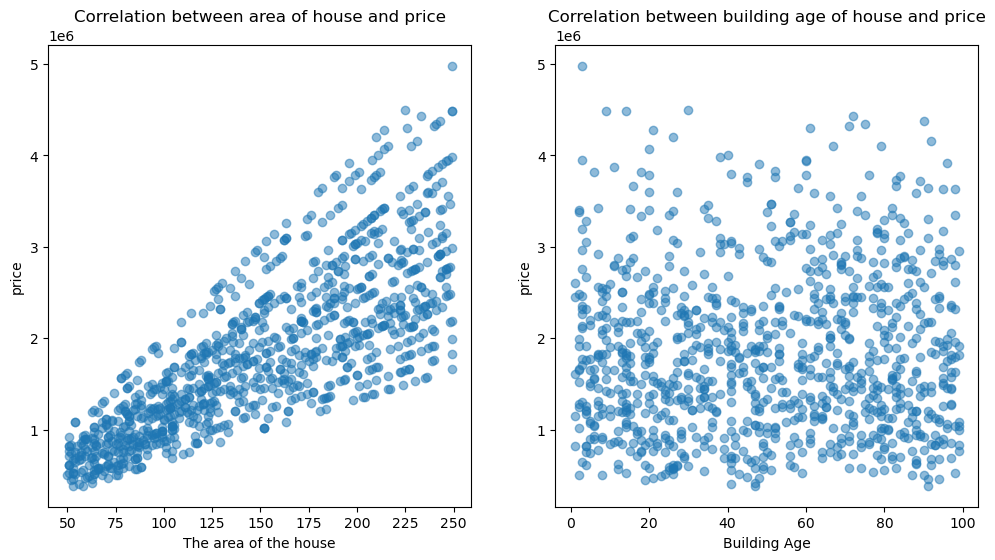

In [435]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
                     
ax[0].scatter(x="Square Meters",y="Price (£)", data=df,alpha=.5)
ax[1].scatter(x="Building Age",y="Price (£)", data=df,alpha=.5)
                     
ax[0].set_title("Correlation between area of house and price")
ax[0].set_xlabel("The area of the house")
ax[0].set_ylabel("price")

ax[1].set_title("Correlation between building age of house and price")
ax[1].set_xlabel("Building Age")
ax[1].set_ylabel("price")
plt.show()

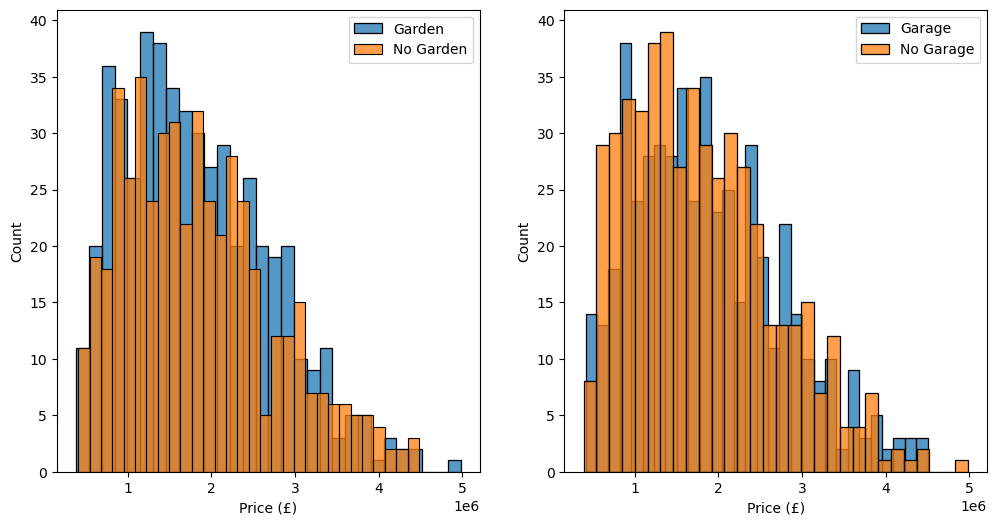

In [436]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df[df['Garden'] == 'Yes']['Price (£)'], bins=30, ax=ax[0], label='Garden')
sns.histplot(df[df['Garden'] == 'No']['Price (£)'], bins=30, ax=ax[0], label='No Garden')
ax[0].legend()

sns.histplot(df[df['Garage'] == 'Yes']['Price (£)'], bins=30, ax=ax[1], label='Garage')
sns.histplot(df[df['Garage'] == 'No']['Price (£)'], bins=30, ax=ax[1], label='No Garage')
ax[1].legend()

plt.show()

In [437]:
df["Price (£)"].groupby(df["Floors"]).mean()

Floors
1    1.797951e+06
2    1.896289e+06
3    1.830673e+06
Name: Price (£), dtype: float64

In [438]:
PropertyType_price=df["Price (£)"].groupby(df["Property Type"]).mean()
PropertyType_price

Property Type
Apartment         1.469727e+06
Detached House    2.191272e+06
Semi-Detached     1.815411e+06
Name: Price (£), dtype: float64

In [439]:
df["Price (£)"].groupby(df["Heating Type"]).mean()

Heating Type
Central Heating       1.853959e+06
Electric Heating      1.871575e+06
Gas Heating           1.813569e+06
Underfloor Heating    1.822938e+06
Name: Price (£), dtype: float64

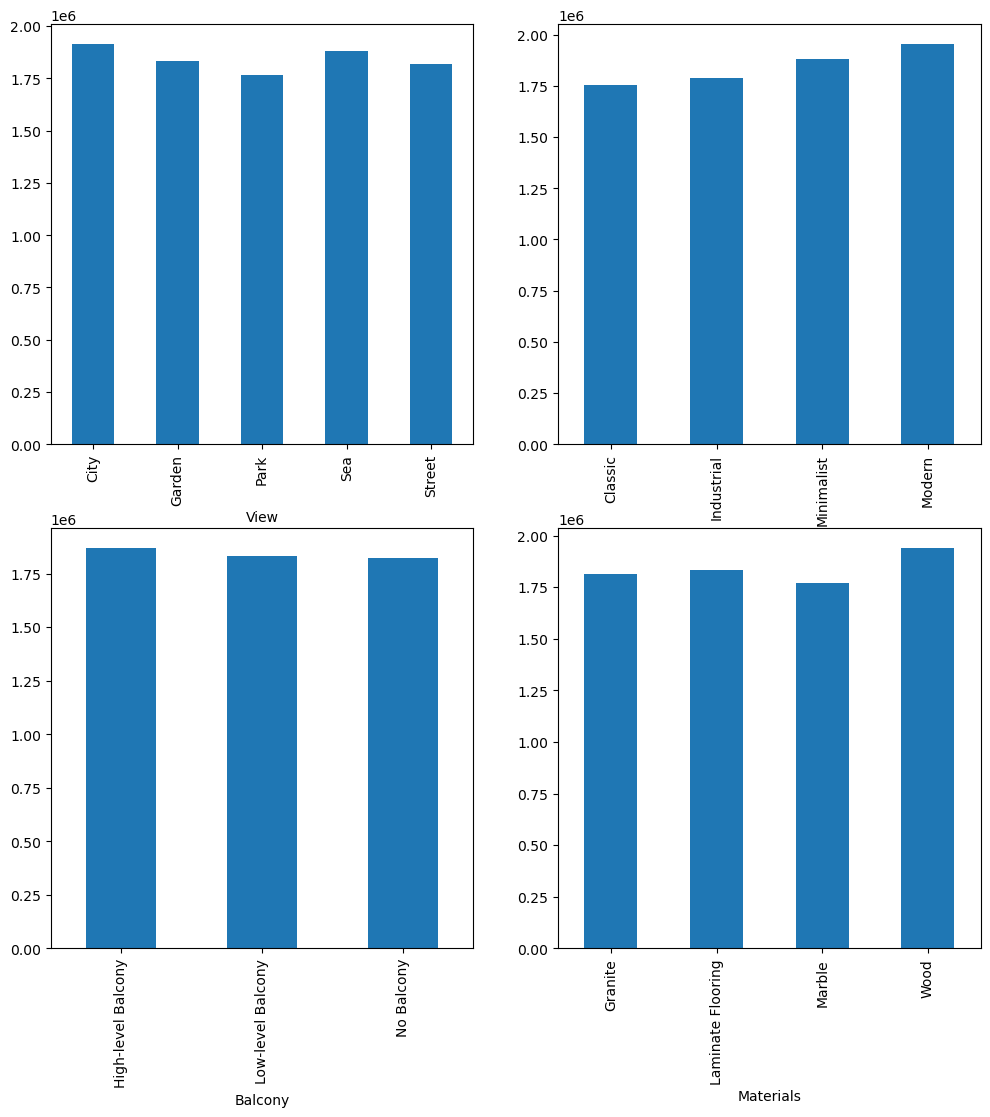

In [440]:
col=["View","Interior Style","Balcony","Materials"]
fig,ax=plt.subplots(2,2,figsize=(12,12))
for i,j in enumerate(col):
    df["Price (£)"].groupby(df[j]).mean().plot(kind="bar",ax=ax[i//2, i%2])

plt.show()
    

In [441]:
Status_Price=df["Price (£)"].groupby(df["Building Status"]).mean()
Status_Price

Building Status
New          1.892813e+06
Old          1.722782e+06
Renovated    1.903353e+06
Name: Price (£), dtype: float64

In [442]:
df.columns


Index(['Address', 'Neighborhood', 'Bedrooms', 'Bathrooms', 'Square Meters',
       'Building Age', 'Garden', 'Garage', 'Floors', 'Property Type',
       'Heating Type', 'Balcony', 'Interior Style', 'View', 'Materials',
       'Building Status', 'Price (£)'],
      dtype='object')

In [443]:
y=df["Price (£)"]
x=df.drop(columns=["Price (£)",'Address','Bedrooms', 'Bathrooms','Building Age', 'Garden', 'Garage', 'Floors',
                   'Heating Type', 'Balcony','View', 'Materials','Building Status'])

Encoding and normalizing the data

In [444]:
from sklearn.preprocessing import LabelEncoder
label_enc=x.copy()
label_enc=label_enc.astype(str)
label_enc=label_enc.apply(LabelEncoder().fit_transform)
label_enc

,Neighborhood,Square Meters,Property Type,Interior Style
0,6,78,2,1
1,9,23,0,1
2,8,67,2,1
3,3,135,0,0
4,5,27,2,3
...,...,...,...,...
995,9,178,2,3
996,0,162,0,1
997,0,90,2,2
998,0,31,1,3


In [445]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(label_enc)
X_scaled


array([[0.66666667, 0.39795918, 1.        , 0.33333333],
       [1.        , 0.11734694, 0.        , 0.33333333],
       [0.88888889, 0.34183673, 1.        , 0.33333333],
       ...,
       [0.        , 0.45918367, 1.        , 0.66666667],
       [0.        , 0.15816327, 0.5       , 1.        ],
       [0.44444444, 0.42857143, 0.        , 1.        ]])

In [446]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

Build LGBMRegressor model

In [478]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 4
[LightGBM] [Info] Start training from score 1839455.711429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor()

Calculat preformance of the model


In [473]:
pred=lgbm_model.predict(X_test)
lgbm_error=mean_absolute_error(pred,y_test)
print("MEA is : ",mean_absolute_error(pred,y_test))


MEA is :  58444.49455163198


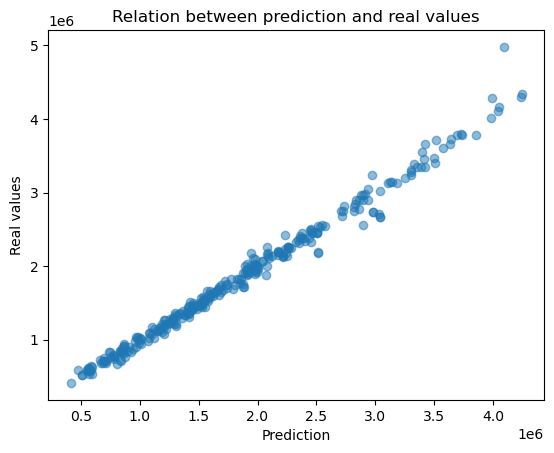

In [487]:
plt.scatter(x=pred,y=y_test,alpha=0.5)
plt.title("Relation between prediction and real values")
plt.xlabel("Prediction")
plt.ylabel("Real values")
plt.show()

Build Random Forest Regressor Model

In [482]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(random_state=42)
RFR.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Calculat preformance of the model

In [485]:
pred1=RFR.predict(X_test)
RFR_error=mean_absolute_error(pred1,y_test)
print("MAE is :",RFR_error)

MAE is : 150011.37836666667


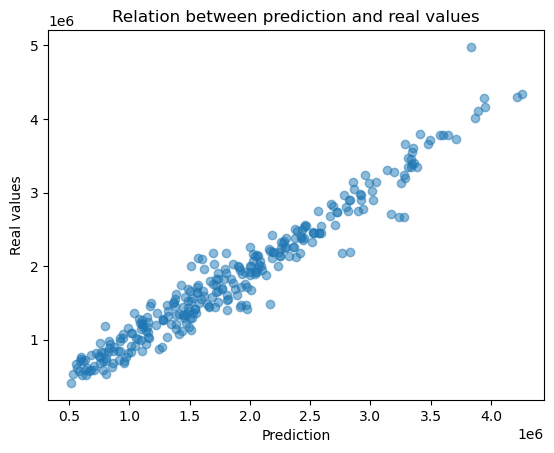

In [503]:
plt.scatter(x=pred1,y=y_test,alpha=0.5)
plt.title("Relation between prediction and real values")
plt.xlabel("Prediction")
plt.ylabel("Real values")
plt.show()

Build Decision Tree Regressor

In [497]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor(random_state=42)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

Calculat preformance of the model

In [501]:
pred2=DTR.predict(X_test)
DTR_error=mean_absolute_error(pred2,y_test)
print("MAE is :",DTR_error)

MAE is : 155772.91


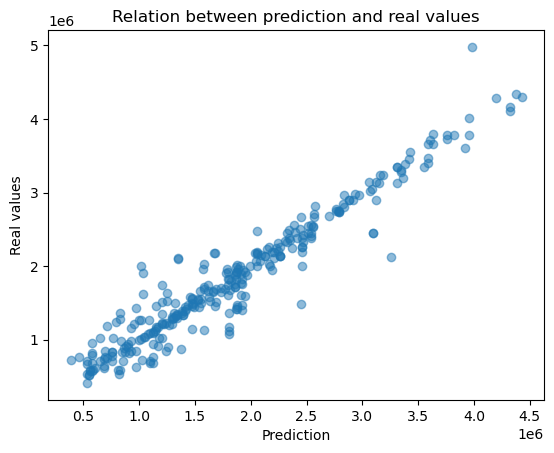

In [505]:
plt.scatter(x=pred2,y=y_test,alpha=0.5)
plt.title("Relation between prediction and real values")
plt.xlabel("Prediction")
plt.ylabel("Real values")
plt.show()

Comparing bteween the models

In [512]:
Models_error={"LGBMRegressor" : lgbm_error ,
             "RandomForestRegressor" : RFR_error ,
             "DecisionTreeRegressor" : DTR_error}
Models_error

{'LGBMRegressor': 58444.49455163198,
 'RandomForestRegressor': 150011.37836666667,
 'DecisionTreeRegressor': 155772.91}

The best model for these data is LGBMRegressor ......
LGBMRegressor shows the least error of the models